<a href="https://colab.research.google.com/github/Saranyadharani/Water-Automater/blob/main/Watermark_Automater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Libraries installed
📤 UPLOAD YOUR FILES (Images: JPG, PNG, etc.)


Saving Example.png to Example (1).png

✅ Uploaded 1 file(s):
   • Example (1).png
🔍 Previewing: Example (1).png
📷 ORIGINAL:


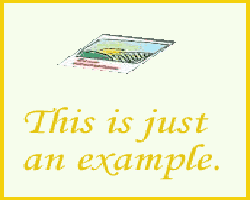


🛡️ WITH 'PROTECTED' WATERMARK:


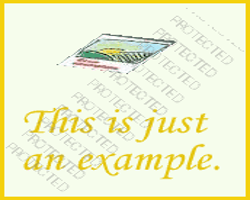


⚙️ Watermark Settings:
   • Text: 'PROTECTED'
   • Color: Gray
   • Angle: -45° diagonal
   • Transparency: High
🔄 Processing 1 file(s)...
✅ 1. Example (1).png → PROTECTED_Example (1).png

🎉 1 file(s) watermarked successfully!

📥 **DOWNLOAD READY!**
📦 ZIP Package: 1 file(s)
📏 Size: 13.6 KB

⬇️ **Download starting automatically...**


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📎 Individual files (click to download):


💡 Quick download (one by one):
----------------------------------------
1. ❌ Failed: Example (1).png
💾 Files preserved for future downloads.

🎉 READY! Upload files → Get protected files instantly!


In [2]:
# %% [markdown]
# # 🛡️ **PROTECTED Watermark with Instant Download**
# *Watermark files → Preview → Download immediately*

# %% [markdown]
# ## 📦 **Install Libraries**

# %%
!pip install Pillow tqdm -q
print("✅ Libraries installed")

# %% [markdown]
# ## 🛠️ **Import & Setup**

# %%
import os
from PIL import Image, ImageDraw, ImageFont
from pathlib import Path
from tqdm import tqdm
from IPython.display import display, HTML, clear_output
from google.colab import files
import zipfile

# %% [markdown]
# ## 🎨 **Watermarker Class**

# %%
class ProtectedWatermarker:
    def __init__(self):
        self.watermark_text = "PROTECTED"
        self.text_color = (128, 128, 128)  # GRAY
        self.opacity = 90
        self.font_size = 80

        try:
            self.font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", self.font_size)
        except:
            self.font = ImageFont.load_default()

    def add_watermark(self, image):
        if image.mode != 'RGBA':
            image = image.convert('RGBA')

        watermark = Image.new('RGBA', image.size, (255, 255, 255, 0))
        draw = ImageDraw.Draw(watermark)

        # Draw diagonal pattern
        text_bbox = draw.textbbox((0, 0), self.watermark_text, font=self.font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

        # Create grid of watermarks
        for x in range(-text_width, image.width + text_width, text_width * 2):
            for y in range(-text_height, image.height + text_height, text_height * 2):
                # Draw at an angle
                draw.text((x, y), self.watermark_text,
                         font=self.font,
                         fill=(*self.text_color, self.opacity))

        # Rotate entire watermark layer
        watermark = watermark.rotate(-45, expand=0, fillcolor=(255, 255, 255, 0))

        # Composite with original
        result = Image.alpha_composite(image, watermark)

        if image.mode == 'RGB':
            result = result.convert('RGB')

        return result

    def process_and_download(self, input_paths):
        """Process files and trigger immediate download"""
        output_folder = "/content/protected_output"
        os.makedirs(output_folder, exist_ok=True)

        processed_files = []

        print(f"🔄 Processing {len(input_paths)} file(s)...")

        for i, input_path in enumerate(input_paths, 1):
            try:
                with Image.open(input_path) as img:
                    watermarked = self.add_watermark(img)

                    # Save with protected prefix
                    output_name = f"PROTECTED_{Path(input_path).name}"
                    output_path = os.path.join(output_folder, output_name)
                    watermarked.save(output_path, quality=95)

                    processed_files.append(output_path)
                    print(f"✅ {i}. {Path(input_path).name} → {output_name}")

            except Exception as e:
                print(f"❌ Error with {Path(input_path).name}: {str(e)[:50]}...")

        print(f"\n🎉 {len(processed_files)} file(s) watermarked successfully!")
        return processed_files, output_folder

# %% [markdown]
# ## 📤 **UPLOAD FILES SECTION**

# %%
# @title **📤 STEP 1: Upload Your Files**
print("📤 UPLOAD YOUR FILES (Images: JPG, PNG, etc.)")
print("=" * 50)

uploaded = files.upload()

if not uploaded:
    print("❌ No files uploaded!")
else:
    print(f"\n✅ Uploaded {len(uploaded)} file(s):")
    for filename in uploaded.keys():
        print(f"   • {filename}")

# Save uploaded files
input_paths = []
for filename, content in uploaded.items():
    filepath = f"/content/{filename}"
    with open(filepath, 'wb') as f:
        f.write(content)
    input_paths.append(filepath)

# %% [markdown]
# ## 👀 **PREVIEW SECTION**

# %%
# @title **👀 STEP 2: Preview Watermark Effect**
if input_paths:
    watermarker = ProtectedWatermarker()
    first_file = input_paths[0]

    print(f"🔍 Previewing: {Path(first_file).name}")
    print("=" * 40)

    with Image.open(first_file) as img:
        # Show original
        print("📷 ORIGINAL:")
        display(img.resize((250, 200)))

        # Show watermarked
        watermarked = watermarker.add_watermark(img)
        print("\n🛡️ WITH 'PROTECTED' WATERMARK:")
        display(watermarked.resize((250, 200)))

        # Watermark details
        print("\n⚙️ Watermark Settings:")
        print("   • Text: 'PROTECTED'")
        print("   • Color: Gray")
        print("   • Angle: -45° diagonal")
        print("   • Transparency: High")
else:
    print("❌ No files to preview!")

# %% [markdown]
# ## 🚀 **PROCESS & DOWNLOAD SECTION**

# %%
# @title **🚀 STEP 3: Process & Download Now**
if input_paths:
    watermarker = ProtectedWatermarker()

    # Process files
    processed_files, output_folder = watermarker.process_and_download(input_paths)

    if processed_files:
        print("\n" + "="*50)
        print("📥 **DOWNLOAD READY!**")
        print("="*50)

        # Option 1: Download ALL as ZIP
        zip_path = "/content/PROTECTED_FILES.zip"

        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for file in processed_files:
                zipf.write(file, Path(file).name)

        file_size = os.path.getsize(zip_path) / 1024  # KB
        print(f"📦 ZIP Package: {len(processed_files)} file(s)")
        print(f"📏 Size: {file_size:.1f} KB")

        # TRIGGER DOWNLOAD
        print("\n⬇️ **Download starting automatically...**")
        files.download(zip_path)

        # Option 2: Show individual download links
        print("\n📎 Individual files (click to download):")
        for file in processed_files:
            filename = Path(file).name
            display(HTML(f'<a href="{file}" download="{filename}">⬇️ {filename}</a>'))

    else:
        print("❌ No files were processed!")
else:
    print("❌ Please upload files in Step 1 first!")

# %% [markdown]
# ## 📋 **QUICK DOWNLOAD ALTERNATIVE**

# %%
# @title **📋 Direct Single-File Download**
if input_paths:
    print("💡 Quick download (one by one):")
    print("-" * 40)

    watermarker = ProtectedWatermarker()

    for i, input_path in enumerate(input_paths, 1):
        try:
            with Image.open(input_path) as img:
                watermarked = watermarker.add_watermark(img)

                # Save to temp location
                temp_output = f"/content/temp_protected_{i}.jpg"
                watermarked.save(temp_output, quality=95)

                # Download immediately
                original_name = Path(input_path).stem
                download_name = f"PROTECTED_{original_name}.jpg"

                print(f"{i}. Downloading: {download_name}")
                files.download(temp_output)

        except Exception as e:
            print(f"{i}. ❌ Failed: {Path(input_path).name}")

# %% [markdown]
# ## 🔄 **CLEAN UP**

# %%
# @title **🧹 Clear Temporary Files**
clear_files = False  # @param {type:"boolean"}

if clear_files:
    import shutil

    folders_to_clear = ['/content/protected_output', '/content/temp_protected_*']
    files_to_clear = ['/content/*.jpg', '/content/*.png', '/content/*.zip']

    for folder in folders_to_clear:
        shutil.rmtree(folder, ignore_errors=True)

    print("✅ Temporary files cleared!")
    print("🎯 Ready for new uploads.")
else:
    print("💾 Files preserved for future downloads.")

# %% [markdown]
# ## 🎯 **QUICK START GUIDE**
#
# 1. **Run all cells** (Runtime → Run all)
# 2. **Upload files** when prompted in Step 1
# 3. **Preview** the watermark in Step 2
# 4. **Download automatically** in Step 3
#
# **Files will download as:** `PROTECTED_filename.jpg`

print("\n" + "="*60)
print("🎉 READY! Upload files → Get protected files instantly!")
print("="*60)